In [380]:
import scipy.io as sio
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data=sio.loadmat('C:\\Users\\Ankesh\\Desktop\\DS\\ML COURSEERA\\EXEECISE\\machine-learning-ex\\machine-learning-ex8\\ex8\\ex8data1.mat')

In [381]:
data['X']
d_train=pd.DataFrame(data['X'],columns=['x1','x2'])
Xval=pd.DataFrame(data['Xval'],columns=['Xval1','Xval2'])
yval=pd.DataFrame(data['yval'],columns=['yval'])
d_test=pd.concat([Xval,yval],axis=1)
m=(d_train.shape)[0]
yval=np.array(yval[:]['yval'])

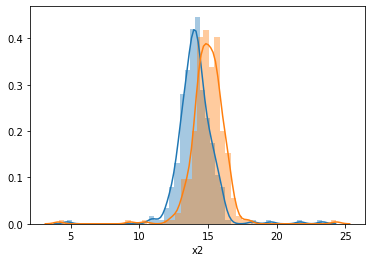

In [382]:
sns.distplot(d_train['x1'])
sns.distplot(d_train['x2'])

In [383]:
#find parameters mean and  variance using training data
mu=(d_train.sum())/m
sigma2=(np.var(d_train))
print('mean={}\n ,variance={} \n'.format(mu,sigma2))
from scipy.stats import multivariate_normal
'''In probability theory, a probability density function, or density of a continuous
random variable, is a function whose value at any given sample in the sample space can be interpreted as providing 
a relative likelihood that the value of the random variable would equal that sample'''
pval = multivariate_normal.pdf(Xval, mean=mu, cov=sigma2)

mean=x1    14.112226
x2    14.997711
dtype: float64
 ,variance=x1    1.832631
x2    1.709745
dtype: float64 



In [384]:
bestEpsilon = 0
bestF1 = 0
F1 = 0
stepsize = (max(pval) - min(pval)) / 1000
for epsilon in np.arange (min(pval),max(pval),stepsize):
    predictions = (pval < epsilon)
    fp = sum((predictions == 1) & (yval==0))
    fn = sum((predictions == 0) & (yval == 1))
    tp = sum((predictions == 1) & (yval == 1))
    prec = tp / (tp + fp)
    rec = tp / (tp + fn)
    F1 = 2 * prec * rec / (prec + rec)
    if F1 > bestF1:
        bestF1 = F1
        bestEpsilon = epsilon

C:\Users\Ankesh\anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.


In [385]:
print('best F1',bestF1)
print('epsion',bestEpsilon)
epsilon=bestEpsilon
outliers = np.where(pval<epsilon)
print(outliers)

best F1 0.8750000000000001
epsion 8.990852779269493e-05
(array([300, 301, 302, 303, 304, 305, 306], dtype=int64),)


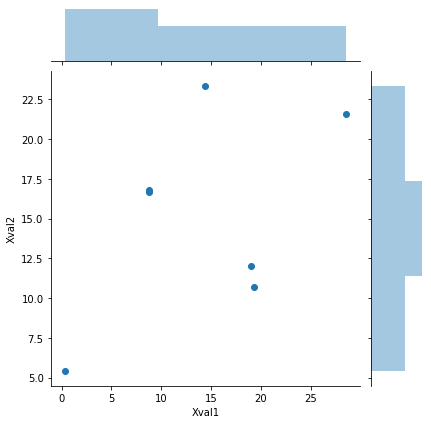

In [386]:
sns.jointplot(x='Xval1',y='Xval2',data=Xval.iloc[outliers])